
## TP 3 : Sods Shock Tube.

---

Binôme : Khaled Ibrahim & Servranckx Christophe.

---

Pour ce 3ème travail personnel nous allons nous intéresser au problème du "tube à chocs". 

Brièvement, il s'agit d'un tube contenant un gaz et séparé en 2 régions par un diaphragme infiniment mince. Le gaz contenu dans ces deux régions étant initialement à des pressions différentes, la rupture instantanée du diaphragme aura pour conséquence de généré une onde de choc (à 1 dimension) à l'intérieur du tube. 

L'objectif de ce travail personnel est alors de calculer la pression, la densité et la vitesse du gaz compressible au travers du tube à chocs et ce pour un instant qui succède la rupture du diaphragme. Pour se faire nous utiliserons la méthode de Richtmyer introduite dans la partie théorique de l'énoncé de ce travail personnel.

---
##### 1. Rappel & développement théorique:

---

#### 1.1 Les équations d'Euler.
---

Comme annoncé dans l'énoncé du problème, les équations d'Euler gouverne le mouvement d'un fluide non-visqueux. Par conséquent elles vont nous permettrent de décrire l'écoullement à 1 dimension du gaz dans le tube à chocs lorsque le diaphragme est rompu.

Les équations d'Euler sont ainsi constituées des équations suivantes :

$$
\left\{
    \begin{array}{lll}
        &\frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}(\rho u) = 0 & \mbox{(conservation de la masse)}\\
        &\frac{\partial}{\partial t}(\rho u) + \frac{\partial}{\partial x} (\rho u^2 + p) = 0 & \mbox{(conservation de la QDM)}\\
        &\frac{\partial}{\partial t}(\rho e_T) + \frac{\partial}{\partial x} (\rho u e_T +p u)= 0 & \mbox{(conservation de l'énergie)}
    \end{array}
\right.
$$

où 

$$
    \begin{array}{ll}
        \mbox{QDM signifie "quantité de mouvements"}\\
        e_T = e+u^2/2 \mbox{, est l'énergie totale par unité de masse}\\
        \rho \mbox{, est la ddensité du fluide}\\
        u \mbox{, est la vitesse du fluide}\\
        p \mbox{, est la pression du fluide}\\
    \end{array}
$$

Les équations d'Euler, sous la forme conservative (fournissant des résultats plus précis), peuvent alors être écritent sous forme vectorielle comme suit :


\begin{equation}
\frac{\partial }{\partial t} \overline{\mathbf{u}} + \frac{\partial }{\partial x} \overline{\mathbf{f}} = 0
\end{equation}
avec $\overline{\mathbf{u}}$ le vecteur des variables conservées et $\overline{\mathbf{f}}$ le vecteur de flux, donnés par :

\begin{align}
\overline{\mathbf{u}} & = \begin{pmatrix} \rho \\ \rho u \\ \rho e_T \end{pmatrix} & \overline{\mathbf{f}} & = \begin{pmatrix} \rho u \\ \rho u^2 + p \\ (\rho e_T + p) u  \end{pmatrix}.
\end{align}

Mais comme on à put le remarquer nous disposons ici de 3 équations pour 4 inconnues. En introduisant alors l'équation d'état qu'est l'équation des gaz idéaux, nous pouvons obtenir une équation supplémentaire avec l'équation pour la pression suivante :

\begin{equation}
p = (\gamma -1)\left(\rho e_T - \frac{\rho u^2}{2}\right)
\end{equation}
où $\gamma^{1} = 1.4$

En outre, en exprimant la pression en terme du vecteur des variables conservées $\overline{\mathbf{u}}$ :

$$p = (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1} \right)$$

et en remarquant que $\overline{\mathbf{f}}$ est une fonction de $\overline{\mathbf{u}}$ et que nous pouvons alors également exprimer $\overline{\mathbf{f}}$ en terme de $$ \overline{\mathbf{u}} = 
\left[ \begin{array}{c}
u_1 \\
u_2 \\
u_3 \\ 
\end{array} \right] =
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]$$,


$$→ \overline{\mathbf{f}} = \left[ \begin{array}{c}
f_1 \\
f_2 \\
f_3 \\ \end{array} \right] =
\left[ \begin{array}{c}
u_2\\
\frac{u^2_2}{u_1} + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1} \right) \\
\left(u_3 + (\gamma -1)\left(u_3 - \frac{1}{2} \frac{u^2_2}{u_1}\right) \right) \frac{u_2}{u_1}\\ \end{array}
\right]$$

qui est facilement résolvable.

In [1]:
%matplotlib inline
import numpy 
from matplotlib import pyplot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
# On définit notre grille spatiale
nx = 81
x = numpy.linspace(-10,10,nx)

# Conditions initiales à gauche du diaphragme
rho_L = 1
u_L   = 0
p_L   = 100000

# Conditions initiale à droite du diaphragme
rho_R = .125
u_R   = 0
p_R   = 10000

expli u3 est la pression au temps t = 0

In [3]:
x1 = numpy.ones(nx)
    
u1 = x1*rho_L                      # densité à gauche du diaphragme
u1[int((nx-1)/2):] = rho_R         # densité à droite du diaphragme
u2 = x1*u_L                        # vitesse à gauche du diaphragme
u2[int((nx-1)/2):] = u_R           # vitesse à droite du diaphragme
u3 = x1*p_L                        # pression à gauche du diaphragme
u3[int((nx-1)/2):] = p_R           # pression à droite du diaphragme

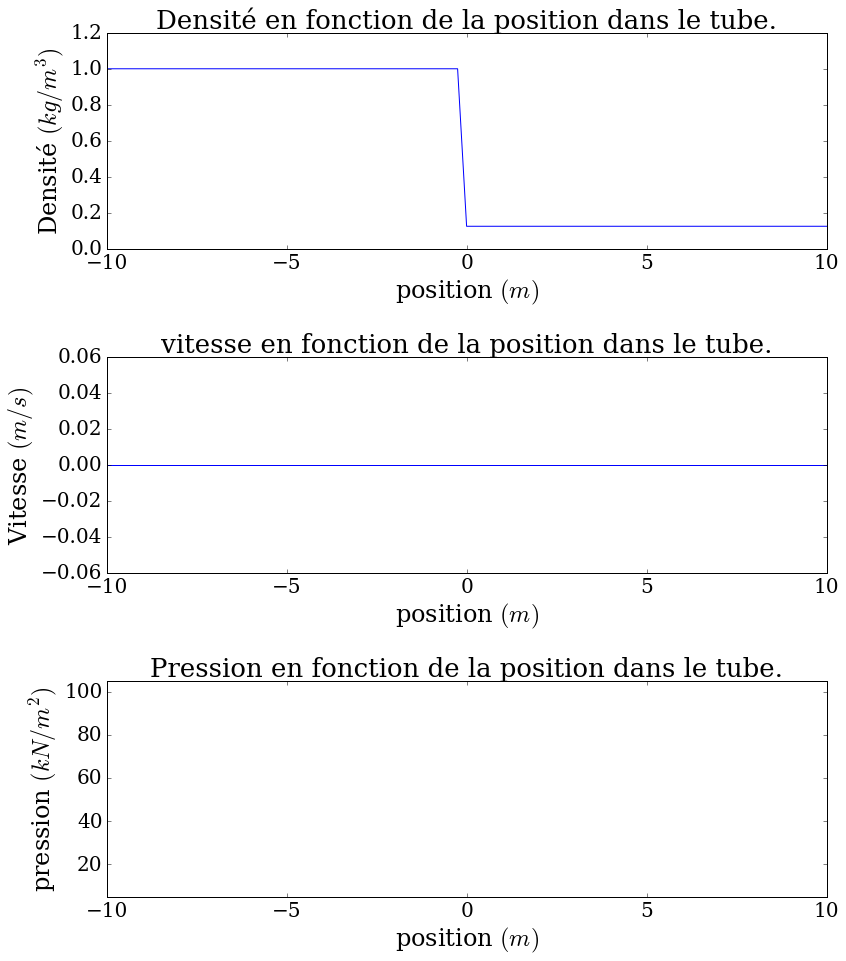

In [4]:
figure = pyplot.figure(figsize = (25, 30))
figure.subplots_adjust(left = 0.3, bottom = 0.3,
                       right = 0.7, top = 0.7, wspace = 0, hspace = .5)

pyplot.subplot(3, 1, 1)
pyplot.title('Densité en fonction de la position dans le tube.', fontsize=26)
pyplot.plot(x, u1, 'b-')
pyplot.ylabel('Densité $(kg/m^{3})$',fontsize=24)
pyplot.ylim(0,1.2)
pyplot.xlabel('position $(m)$',fontsize=24)
pyplot.tick_params(axis='both', labelsize=20)


pyplot.subplot(3, 1, 2)
pyplot.title('vitesse en fonction de la position dans le tube.', fontsize=26)
pyplot.plot(x, u2, 'b-')
pyplot.ylabel('Vitesse $(m/s)$',fontsize=24)
pyplot.xlabel('position $(m)$',fontsize=24)
pyplot.tick_params(axis='both', labelsize=20)

pyplot.subplot(3, 1, 3)
pyplot.title('Pression en fonction de la position dans le tube.',fontsize=26)
pyplot.plot(x, u3, 'b-')
pyplot.ylabel('pression $(kN/m^{2})$',fontsize=24)
pyplot.ylim(5,105)
pyplot.xlabel('position $(m)$',fontsize=24)
pyplot.tick_params(axis='both', labelsize=20)

Création de la fonction flux

In [5]:
def flux(u):

    """Calcul du vecteur flux

    Paramètres
    ----------
    u[0]  : tableau de floats
        rho
    u[1]  : tableaux de floats
        rho*u
    u[2]  : tableau de floats
        rho*e_T
        
    Returns
    -------
        F : tableau
        tableau avec le vecteur flux pour tout point x
    """

    return numpy.array([u[1,:],(u[1,:]**2/u[0,:])+((gamma-1)*(u[2,:]-(0.5*(u[1,:]**2/u[0,:])))),
            (u[2,:]+((gamma-1)*(u[2,:]-0.5*(u[1,:]**2/u[0,:]))))*(u[1,:]/u[0,:])])

commentaire sur u3 qui n'est pas la pression mais ...

In [6]:
gamma = 1.4

x1 = numpy.ones(nx)
    
u1 = x1*rho_L                        # densité à gauche du diaphragme
u1[int((nx-1)/2):] = rho_R           # densité à droite du diaphragme

u2 = x1*rho_L*u_L                    # vitesse*densité à gauche du diaphragme
u2[int((nx-1)/2):] = rho_R*u_R       # vitesse*densité à droite du diaphragme

u3 = x1*p_L/(gamma-1)                # rho*e_T à gauche du diaphragme
u3[int((nx-1)/2):] = p_R/(gamma-1)   # rho*e_T à droite du diaphragme

u = numpy.empty((3,nx))
u = numpy.array([u1,u2,u3])

In [7]:
t_sim = 0.01
dx = 0.25
dt = 0.0002
nt= int(t_sim/dt)+1

u_n = numpy.zeros((nt,len(u),nx))
u_n[:,:,:nx] = u.copy()
u_star = numpy.empty_like(u)
u_star = u.copy()

for t in range(1,nt):
    F = flux(u)
    u_star[:,1:] = 0.5 * (u[:,1:]+u[:,:-1] - dt/dx * (F[:,1:] - F[:,:-1]))
    Fstar = flux(u_star)
    u_n[t,:,:-1] = u[:,:-1] - dt/dx * (Fstar[:,1:]-Fstar[:,:-1])
    u = u_n[t,:,:].copy()

In [8]:
z = numpy.empty_like(u)

#z[1] = u_n[1]/u_n[0]
#print(z[1])

indx=(12.5/dx)

print(u_n[nt-1,0,indx])
print(u_n[nt-1,1,indx]/u_n[nt-1,0,indx])
print (u[1,indx]/u[0,indx])
print((gamma-1)*(u[2,indx]-0.5*u[1,indx]**2/u[0,indx]))
#print(u_n[1,indx]/u_n[0,indx])

0.374691402648
292.611471527
292.611471527
30250.8901676


/serveur/logiciels/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/serveur/logiciels/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/serveur/logiciels/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/serveur/logiciels/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:11: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [9]:
def Richtmyer(u, nt, dt, dx, u1, u2, u3):
    """ Calcul la solution avec la méthode de Richtmyer
    
    Paramètres
    ----------
    u1    : tableau de floats
            Densité au pas de temps correspondant
    u2    : tableau de floats
            Densité au pas de temps correspondant
    u3    : tableau de floats
            Densité au pas de temps correspondant
    nt     : int
            Nombre de pas de temps
    dt     : float
            Taille des pas de temps
    dx     : float
            réseau d'espace
    
    Returns
    -------
    rho_n : array of floats
            Density after nt time steps at every point x
    """
   

---
##### x. Sources:

---

---

###### The cell below loads the style of the notebook.

In [10]:
from IPython.core.display import HTML
css_file = '../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())